In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut

In [2]:
#load datasets for two subjects, Math and Portuguese
math_df =pd.read_csv('student-mat.csv')
Portuguese_df = pd.read_csv("student-port.csv")



In [3]:
# merge datasets
student_df = pd.concat([math_df,Portuguese_df],sort=False)

In [4]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
'''
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target
'''
pass

In [6]:
student_df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [7]:
student_df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# look for missing values
student_df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [9]:
student_df.shape

(1044, 33)

In [10]:
student_df.describe()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
student_df['final_grade'] = 'na'
student_df.loc[(student_df.final_score >= 15) & (student_df.final_score <= 20), 'final_grade'] = 'good' 
student_df.loc[(student_df.final_score >= 10) & (student_df.final_score <= 14), 'final_grade'] = 'fair' 
student_df.loc[(student_df.final_score >= 0) & (student_df.final_score <= 9), 'final_grade'] = 'poor' 
student_df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


I have classified these students into three categories, "good", "fair", and "poor", according to their final exam performance.

Text(0, 0.5, 'Number of Student')

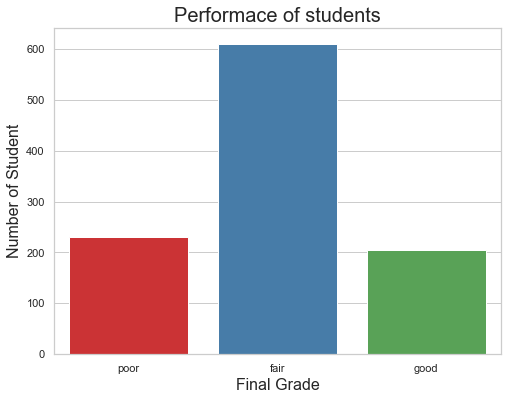

In [12]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(student_df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Performace of students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1, 'Correlation Heatmap')

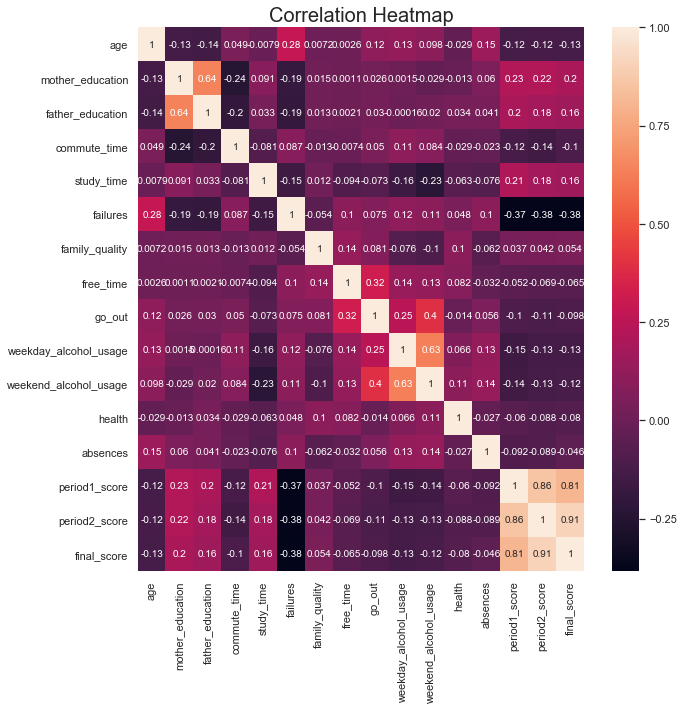

In [13]:
# see correlation between variables through a correlation heatmap
corr = student_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

Text(0.5, 1.0, 'In a romantic relationship')

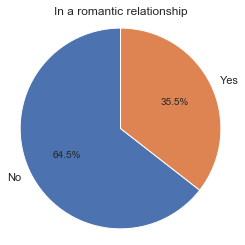

In [14]:
f, ax = plt.subplots(figsize=(4, 4))

plt.pie(student_df['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')
plt.title('In a romantic relationship')

In [15]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance = pd.crosstab(index=student_df.final_grade, columns=student_df.romantic)
romance1 = np.log(romance)
romance_percentage = romance1.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

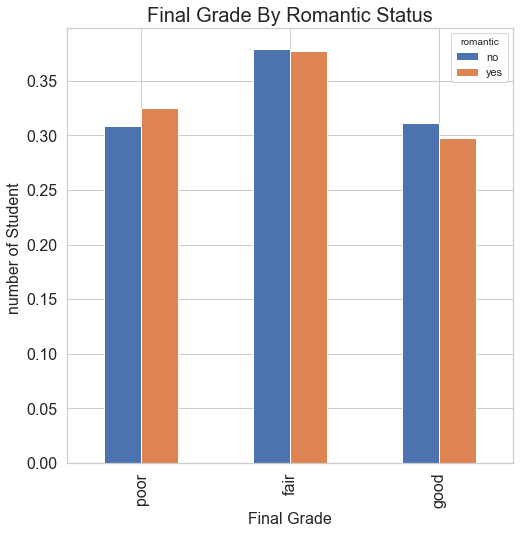

In [16]:
plt.figure()
romance_percentage.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('number of Student ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

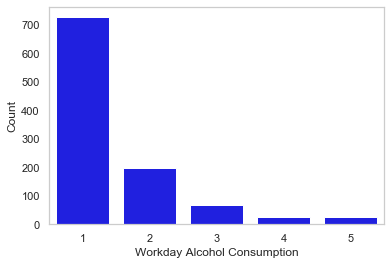

In [17]:
#Weekday alchohol consumption
dalc = student_df['weekday_alcohol_usage']
dalc= dalc.reset_index()
dalc.rename(columns={0:'count'}, inplace=True)
dalc.columns = ['ID','Workday alcohol']
f, ax = plt.subplots()
figure = sns.countplot(x = 'Workday alcohol', data=dalc, order=list(range(1, 6)), color = 'blue')
figure.grid(False)

ax = ax.set(ylabel="Count", xlabel="Workday Alcohol Consumption")

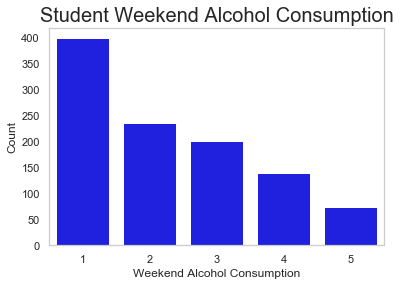

In [18]:
#Weekend Alchohol consumption
walc = student_df['weekend_alcohol_usage']
walc= walc.reset_index()
walc.rename(columns={0:'count'}, inplace=True)
walc.columns = ['ID','Weekend alcohol']
f, ax = plt.subplots()
figure = sns.countplot(x = 'Weekend alcohol', data=walc, order=list(range(1, 6)), color = 'blue')
ax = ax.set(ylabel="Count", xlabel="Weekend Alcohol Consumption")
plt.title('Student Weekend Alcohol Consumption', fontsize=20)
figure.grid(False)


In [19]:
# weekend alcohol consumption
alchohol_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.weekend_alcohol_usage)
alchohol_tab = np.log(alchohol_tab1)
alc_perc = alchohol_tab.apply(perc).reindex(index)

C:\Users\rosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 0, 'Level of Alcohol Consumption')

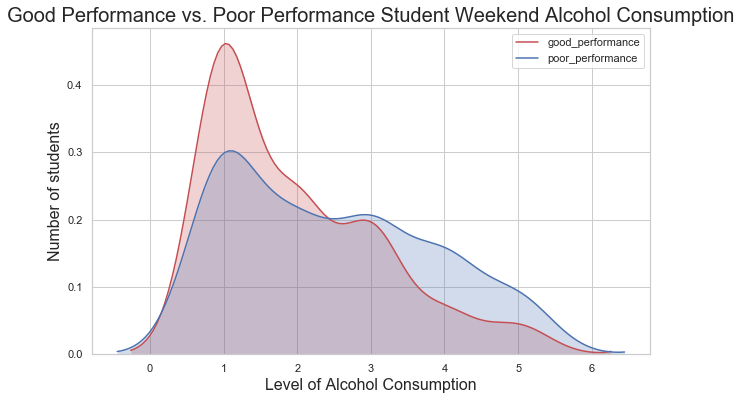

In [20]:
# create good student dataframe
good = student_df.loc[student_df.final_grade == 'good']
good['good_performance']=good.weekend_alcohol_usage
# create poor student dataframe
poor = student_df.loc[student_df.final_grade == 'poor']
poor['poor_performance']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_performance'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_performance'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Number of students', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

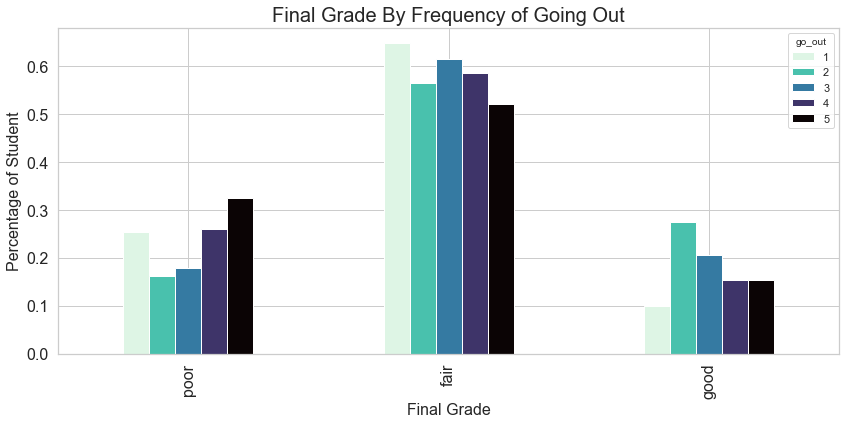

In [21]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
out_tab = pd.crosstab(index=student_df.final_grade, columns=student_df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [22]:
higher_tab = pd.crosstab(index=student_df.final_grade, columns=student_df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

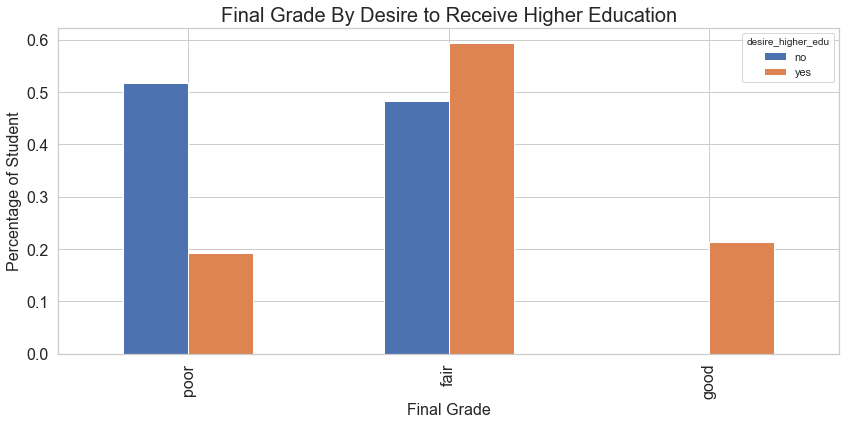

In [23]:
higher_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Feature Engineering

In [24]:
# This will be our transformed dataframes
mathTransformed = math_df.copy(deep=True)
portTransformed = Portuguese_df.copy(deep=True)

In [25]:
def returnCategoricalColumns(df):
    '''
    This function takes in a dataframe and returns the 
    column names which are categorical / must be labeled
    numerically for training.
    '''
    columns = []
    for i in list(df):
        if not str(math_df[i][0]).isdigit():
            columns.append(i)
    return columns

In [26]:
def getBinaryAndNominalColumns(df, categoricalColumns):
    '''
    This function takes a list of categorical columns
    and separates into a list of binary columns, which
    we can easily one label encode into 0/1 and 
    nominal columns which we will need to one hot vector
    encode.
    '''
    binary = []
    nominal = []
    for i in categoricalColumns:
        if len(list(set(df[i]))) == 2:
            binary.append(i)
        else:
            nominal.append(i)
    return binary, nominal

In [27]:
# categorical columns are the same for both portuguesse and math
assert(returnCategoricalColumns(math_df) == returnCategoricalColumns(Portuguese_df))
categoricalColumns = returnCategoricalColumns(math_df)
print(categoricalColumns)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [28]:
binary, nominal = getBinaryAndNominalColumns(math_df, categoricalColumns)
print(binary)
print(nominal)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['Mjob', 'Fjob', 'reason', 'guardian']


In [29]:
def convertBinaryColumns(df, binary, transformed_df):
    '''
    This function converts the binary columns in our dataframe
    into numerical (0/1) labels and adds a corresponding
    column to transformed_df
    '''
    for i in binary:
        lb_style = LabelBinarizer()
        lb_results = lb_style.fit_transform(df[i])
        transformed_df[i] = lb_results

In [30]:
convertBinaryColumns(math_df, binary, mathTransformed)
convertBinaryColumns(Portuguese_df, binary, portTransformed)

In [31]:
assert(list(portTransformed) == list(Portuguese_df))
assert(list(mathTransformed) == list(math_df))

In [32]:
# One hot vector encode nominal variables
mathTransformed = pd.get_dummies(mathTransformed, columns=nominal)
portTransformed = pd.get_dummies(portTransformed, columns=nominal)

In [33]:
assert(list(portTransformed) == list(mathTransformed))

In [34]:
for i in list(mathTransformed):
    if not str(mathTransformed[i][0]).isdigit() or not str(portTransformed[i][0]).isdigit():
        assert(False)

In [35]:
targetColumn = ['G3']
featureColumns = [i for i in list(portTransformed) if i not in targetColumn]
featureColumnsNoGrades = [i for i in featureColumns if i not in ['G1', 'G2']]
assert(len(featureColumns) == len(featureColumnsNoGrades)+2)

In [36]:
portX = portTransformed[featureColumns]
portXNoGrades = portTransformed[featureColumnsNoGrades]
mathX = mathTransformed[featureColumns]
mathXNoGrades = mathTransformed[featureColumnsNoGrades]
portY = portTransformed[targetColumn]
mathY = mathTransformed[targetColumn]


Linear Regression

In [37]:
def linearRegression(originalDf, targetColumn, featureColumns):
    '''
    Runs unregularized linear regression and returns the 
    R^2 and mean squared error (averaged over all folds 
    via cross validation)
    '''
    lm = linear_model.LinearRegression(normalize=True)
    X = originalDf[featureColumns]
    y = originalDf[targetColumn]
    scores = cross_validate(lm, X, y, scoring=['r2','neg_mean_squared_error'], cv=10, return_train_score=False)
    return lm, scores

In [38]:
def linearRegressionRidge(originalDf, targetColumn, featureColumns):
    '''
    Runs ridge regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters = {'alpha' : np.arange(0.0001, 0.01, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error']
    test_scores = []
    lm = linear_model.Ridge(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.cv_results_['mean_test_score'])
    return clf.best_estimator_, test_scores

In [39]:
def linearRegressionLasso(originalDf, targetColumn, featureColumns):
    '''
    Runs lasso regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters =  {'alpha' : np.arange(0.0001, 0.1, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error']
    test_scores = []
    lm = linear_model.Lasso(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.cv_results_['mean_test_score'])
    return clf.best_estimator_, test_scores

In [40]:
def returnAttributesWithLargestCoefficients(training, testing, model):
    '''
    This methods takes in a model and a training testing. It fits
    the model and then returns the attributes with their corresponding
    coefficient, ordered from largest to smallest.
    '''
    model.fit(training, testing)
    coefficients = model.coef_[0]
    finalLst = []
    attributes = list(training)
    assert(len(attributes) == len(coefficients))
    for i in range(len(attributes)):
        finalLst.append([attributes[i], coefficients[i]])
    finalLst.sort(key = lambda x: abs(x[1]), reverse=True)
    return finalLst

In [41]:
#with grades
def runLinearRegression(df, targetColumn, featureColumns):
    '''
    This function runs all the linear regression models on the specific
    dataset using specified target and feature columns and returns back
    the scores as a list of tuples (a,b, c) where a corresponds to the model, 
    b corresponds to the R^2 scores and c corresponds to the mean squared errors
    (over all runs).
    '''
    unregularized_lm, unregularized = linearRegression(df, targetColumn, featureColumns)
    ridge_lm, ridge = linearRegressionRidge(df, targetColumn, featureColumns)
    lasso_lm, lasso = linearRegressionLasso(df, targetColumn, featureColumns)
    return [[unregularized_lm, unregularized['test_r2'], unregularized['test_neg_mean_squared_error']],
            [ridge_lm, ridge[0], ridge[1]],
            [lasso_lm, lasso[0], lasso[1]]]

In [42]:
#Portuguese with grades
unregularized, ridge, lasso = runLinearRegression(portTransformed, targetColumn, featureColumns)

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

Unregularized accuracy: 0.80 (+/- 0.18)
Unregularized accuracy: -1.80 (+/- 2.94)
Ridge accuracy: 0.80 (+/- 0.00)
Ridge accuracy: -1.79 (+/- 0.00)
Lasso accuracy: 0.64 (+/- 0.36)
Lasso accuracy: -3.50 (+/- 3.39)


In [44]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(portX, portY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(portX, portY, ridge[0])

In [45]:
ridge_coeffs

[['G2', 0.8700415607180527],
 ['Fjob_at_home', 0.37292981015346693],
 ['failures', -0.2550523019767029],
 ['reason_other', -0.2482872212585313],
 ['higher', 0.20758855752927924],
 ['Mjob_health', 0.20315245237877697],
 ['guardian_other', 0.20041083177326707],
 ['school', -0.19796090031284982],
 ['paid', -0.19158305067981585],
 ['schoolsup', -0.18417552753028282],
 ['Fjob_teacher', -0.1706094887127026],
 ['Mjob_teacher', 0.15837018042106024],
 ['Mjob_other', -0.15618339466489956],
 ['traveltime', 0.13856144624437502],
 ['G1', 0.12960047102288144],
 ['sex', -0.12259524750553384],
 ['address', 0.11448048372067382],
 ['reason_course', 0.11348888586246413],
 ['Mjob_services', 0.1098243205209091],
 ['Fjob_services', -0.09830608411345644],
 ['Pstatus', -0.09741052106238945],
 ['nursery', -0.09560985105782967],
 ['famsup', 0.09454353948941709],
 ['Medu', -0.0916461883645307],
 ['internet', 0.08520051249193794],
 ['Fjob_health', -0.07123341052983787],
 ['Mjob_at_home', -0.06264054516113944],
 [

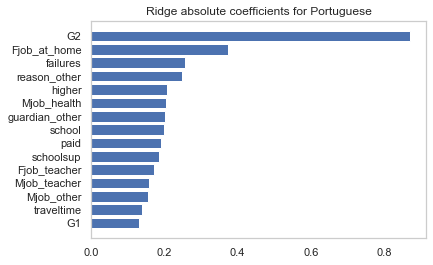

In [46]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Ridge absolute coefficients for Portuguese")
plt.yticks(range(len(y)), x)
ax.grid(False)

In [47]:
unregularized, ridge, lasso = runLinearRegression(portTransformed, ['G3'], ['G2', 'G1'])

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
print("FOR PORTUGUESE")
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))

FOR PORTUGUESE
With just G1, G2: Unregularized accuracy: 0.83 (+/- 0.19)
With just G1, G2: Unregularized accuracy: -1.63 (+/- 2.80)


In [49]:
#Clearly using previous grades is ideal

In [50]:
#Portuguese without grades
unregularized, ridge, lasso = runLinearRegression(portTransformed, targetColumn, featureColumnsNoGrades)

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
print("PORTUGUESE WITHOUT GRADES")
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

PORTUGUESE WITHOUT GRADES
Unregularized accuracy: 0.12 (+/- 0.33)
Unregularized accuracy: -8.01 (+/- 11.21)
Ridge accuracy: 0.12 (+/- 0.00)
Ridge accuracy: -7.96 (+/- 0.00)
Lasso accuracy: -0.07 (+/- 0.25)
Lasso accuracy: -9.73 (+/- 2.22)


In [52]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(portXNoGrades, portY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(portXNoGrades, portY, ridge[0])

In [53]:
ridge_coeffs

[['higher', 1.7328765287361145],
 ['failures', -1.412062105467632],
 ['schoolsup', -1.3109982195017345],
 ['school', -1.2001853539917178],
 ['Fjob_teacher', 0.857834726690596],
 ['Mjob_health', 0.6382126902867111],
 ['sex', -0.6329867621099771],
 ['reason_other', -0.4399081118577788],
 ['romantic', -0.43150585026470323],
 ['studytime', 0.40666714833249273],
 ['paid', -0.371602418736881],
 ['Fjob_services', -0.3651122828273376],
 ['Fjob_health', -0.33390891081911117],
 ['address', 0.322724161401314],
 ['famsize', 0.3024974354826206],
 ['Fjob_at_home', 0.27816524401116455],
 ['Mjob_at_home', -0.26312860379361686],
 ['internet', 0.252894423336253],
 ['guardian_other', 0.2490956988933802],
 ['Mjob_teacher', 0.2486482859985675],
 ['activities', 0.21912490014928773],
 ['nursery', -0.21601977807450295],
 ['reason_reputation', 0.21276411524874017],
 ['Mjob_other', -0.21273084881683818],
 ['Dalc', -0.20478231802135333],
 ['guardian_mother', -0.19428656994546387],
 ['health', -0.1874220766541435

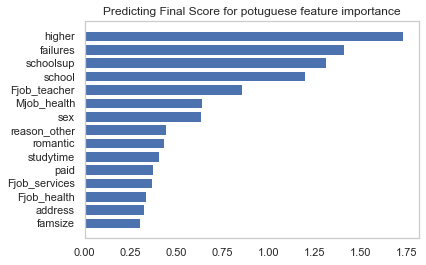

In [54]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Predicting Final Score for potuguese feature importance")
plt.yticks(range(len(y)), x)
ax.grid(False)

In [55]:
#Math with grades
unregularized, ridge, lasso = runLinearRegression(mathTransformed, targetColumn, featureColumns)

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Deprecation

In [56]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

Unregularized accuracy: 0.78 (+/- 0.16)
Unregularized accuracy: -4.33 (+/- 4.29)
Ridge accuracy: 0.78 (+/- 0.00)
Ridge accuracy: -4.31 (+/- 0.00)
Lasso accuracy: 0.76 (+/- 0.09)
Lasso accuracy: -4.92 (+/- 1.93)


In [57]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(mathX, mathY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(mathX, mathY, ridge[0])

In [58]:
ridge_coeffs

[['G2', 0.9569749421623123],
 ['school', 0.4806785918033427],
 ['Fjob_health', 0.4605925095843877],
 ['schoolsup', 0.4565615460448503],
 ['famrel', 0.35677335806260874],
 ['activities', -0.34598283586855844],
 ['reason_other', 0.2952289672597463],
 ['romantic', -0.27220670882275577],
 ['higher', 0.22589743598688197],
 ['nursery', -0.2226862384746505],
 ['reason_home', -0.22165995404966668],
 ['Fjob_services', -0.19230307837921778],
 ['G1', 0.18915999921614982],
 ['Dalc', -0.18494463030526137],
 ['famsup', 0.17682835213472578],
 ['Walc', 0.17675062916401005],
 ['sex', 0.17442411572728314],
 ['age', -0.17331231647888412],
 ['Mjob_health', -0.16126974419194837],
 ['failures', -0.16059873613053516],
 ['internet', -0.1442996179468404],
 ['Fedu', -0.13392959817907027],
 ['Medu', 0.12970163711405683],
 ['Fjob_at_home', 0.12942649442861068],
 ['Pstatus', -0.12782047983191097],
 ['reason_reputation', 0.11656294110717763],
 ['studytime', -0.1047407851722966],
 ['guardian_mother', 0.1045901392964

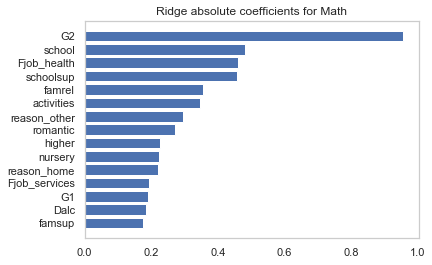

In [59]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Ridge absolute coefficients for Math")
plt.yticks(range(len(y)), x)
ax.grid(False)

In [60]:
unregularized, ridge, lasso = runLinearRegression(mathTransformed, ['G3'], ['G2', 'G1'])

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Deprecation

In [61]:
print("FOR MATH")
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))

FOR MATH
With just G1, G2: Unregularized accuracy: 0.81 (+/- 0.18)
With just G1, G2: Unregularized accuracy: -3.82 (+/- 4.92)


In [62]:
#Using previous grades is ideal

In [63]:
print("MATH WITHOUT GRADES")
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

MATH WITHOUT GRADES
Unregularized accuracy: 0.81 (+/- 0.18)
Unregularized accuracy: -3.82 (+/- 4.92)
Ridge accuracy: 0.82 (+/- 0.00)
Ridge accuracy: -3.81 (+/- 0.00)
Lasso accuracy: 0.77 (+/- 0.10)
Lasso accuracy: -4.88 (+/- 2.01)


In [64]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(mathXNoGrades, mathY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(mathXNoGrades, mathY, ridge[0])

In [65]:
ridge_coeffs

[['failures', -1.7237843879874786],
 ['Fjob_teacher', 1.5592305629028025],
 ['higher', 1.370491955146496],
 ['schoolsup', -1.3504358528570708],
 ['sex', 1.262197082085821],
 ['Mjob_teacher', -1.1979540772484458],
 ['romantic', -1.0943606326722362],
 ['Mjob_health', 1.041245435962719],
 ['famsup', -0.8617372257798027],
 ['school', 0.725297995626433],
 ['famsize', 0.7027324534827633],
 ['Mjob_services', 0.7014156072564999],
 ['guardian_other', 0.5972834123452756],
 ['goout', -0.5935693562119382],
 ['Fjob_health', 0.5808856844653885],
 ['address', 0.5512969850128201],
 ['studytime', 0.5494270474323482],
 ['internet', 0.49807794063035854],
 ['reason_other', 0.49589163168446937],
 ['Medu', 0.4567198624361989],
 ['Fjob_other', -0.38617731711412945],
 ['age', -0.37508400824481625],
 ['paid', 0.33973035277571456],
 ['reason_reputation', 0.3318375810140073],
 ['activities', -0.3294874334262046],
 ['Pstatus', -0.32014695646196983],
 ['Mjob_other', -0.31588375657765017],
 ['freetime', 0.302353231

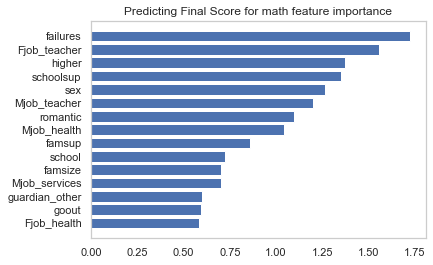

In [66]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Predicting Final Score for math feature importance")
plt.yticks(range(len(y)), x)
ax.grid(False)

In [67]:
#NAIVE METHODS

In [68]:
def calculateMAE(lst1, lst2):
    ''' 
    Calculates the mean absolute error between two lists
    '''
    assert(len(lst1) == len(lst2))
    totalError = 0.0
    for i in range(len(lst1)):
        totalError += abs(lst2[i] - lst1[i])
    return totalError / len(lst1)

In [69]:
def calculateMSE(lst1, lst2):
    ''' 
    Calculates the mean squared error between two lists
    '''
    assert(len(lst1) == len(lst2))
    totalError = 0.0
    for i in range(len(lst1)):
        totalError += (lst2[i] - lst1[i]) ** 2
    return totalError / len(lst1)

In [70]:
mathTransformed['diff'] = mathTransformed['G3'] - mathTransformed['G1']
portTransformed['diff'] = portTransformed['G3'] - portTransformed['G1']

In [71]:
actualDiffMath = list(mathTransformed['diff'])
actualDiffPort = list(portTransformed['diff'])

In [72]:
import statistics as stat
mean_math = sum(actualDiffMath) / len(actualDiffMath)
mean_port = sum(actualDiffPort)/ len(actualDiffPort)
median_math = stat.median(actualDiffMath)
median_port = stat.median(actualDiffPort)

In [73]:
mean_math_lst = [mean_math for _ in range(len(actualDiffMath))]
median_math_lst = [median_math for _ in range(len(actualDiffMath))]
mean_port_lst = [mean_port for _ in range(len(actualDiffPort))]
median_port_lst = [median_port for _ in range (len(actualDiffPort))]

In [74]:
print("MAE for mean, math " + str(calculateMAE(mean_math_lst, actualDiffMath)))
print("MAE for median, math " + str(calculateMAE(median_math_lst, actualDiffMath)))
print("MAE for mean, port " + str(calculateMAE(mean_port_lst, actualDiffPort)))
print("MAE for median, port " + str(calculateMAE(median_port_lst, actualDiffPort)))

MAE for mean, math 1.8810447043743002
MAE for median, math 1.7848101265822784
MAE for mean, port 1.216070237250147
MAE for median, port 1.1864406779661016
